In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#### Read and explore the given dataset

In [ ]:
#Loading data
Electronics_df = pd.read_csv("C:\\Users\\Radhika\\OneDrive\\AIML Program\\Recommendation Systems\\ratings_Electronics.csv", sep=",")

In [ ]:
Electronics_df.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [5]:
Electronics_df.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
Electronics_df.shape

(7824481, 4)

### Keep the users only who has given 50 or more number of ratings 

In [7]:
# Number of ratings per user
Users_reducedto50_df=Electronics_df.groupby(['userId']).filter(lambda s: s.ratings.count()>=50)

In [8]:
Users_reducedto50_df.shape

(125871, 4)

In [164]:
Users_reducedto50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 5 columns):
Unnamed: 0    125871 non-null int64
userId        125871 non-null object
productId     125871 non-null object
ratings       125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [10]:
Users_reducedto50_df.to_csv('reduced50.csv')

In [179]:
#Loading data
Users_reducedto50_df = pd.read_csv("reduced50.csv", sep=",")

<IPython.core.display.Javascript object>


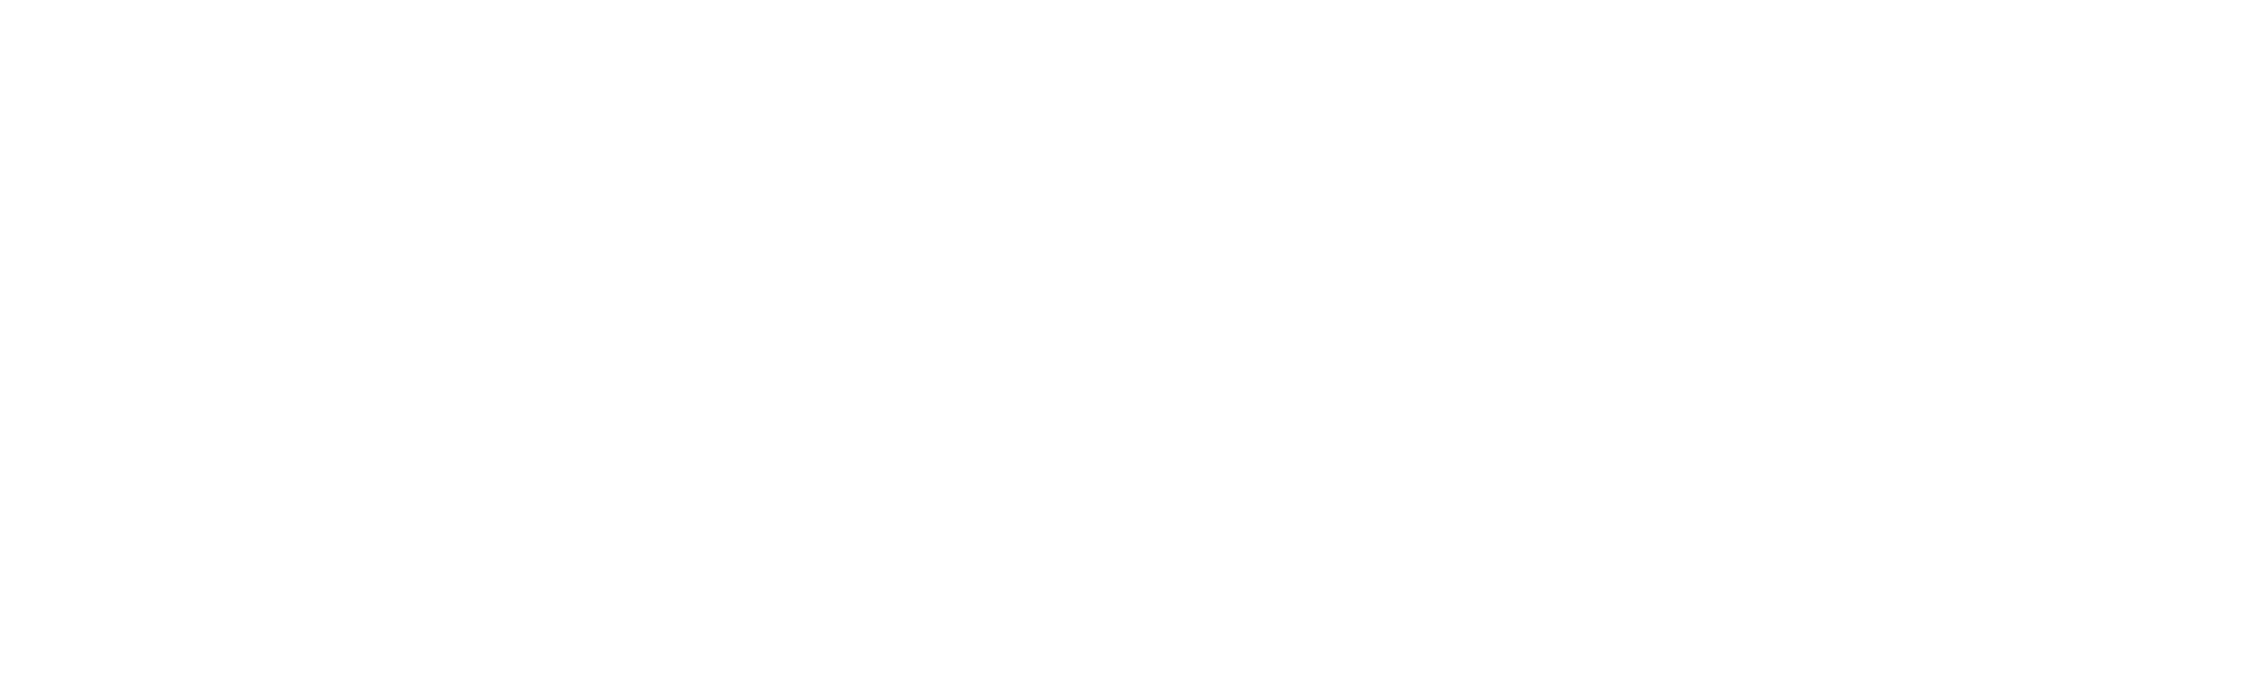

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(3, 1, 1) # subplot(211)
plt.title('Histogram distribution of the Electronics dataset')
plt.hist(Users_reducedto50_df.productId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Product Id')
plt.subplot(3, 1, 2)
plt.hist(Users_reducedto50_df.ratings, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Ratings')
plt.subplot(3, 1, 3)
plt.hist(Users_reducedto50_df.userId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('User Id')
plt.show()

In [ ]:
Users_reducedto50_df['ratings'].unique()

In [ ]:
Users_reducedto50_df['productId'].unique()

In [ ]:
plt.subplot(3, 1, 1) # subplot(211)
plt.title('Histogram distribution of the Electronics dataset')
plt.hist(Users_reducedto50_df.productId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Product Id')
plt.subplot(3, 1, 2)
plt.hist(Users_reducedto50_df.ratings, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Ratings')
plt.subplot(3, 1, 3)
plt.hist(Users_reducedto50_df.userId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('User Id')
plt.show()

In [157]:
from sklearn.model_selection import train_test_split

trainDF, tempDF = train_test_split(Users_reducedto50_df, test_size = 0.2, random_state = 100)
testDF = tempDF.copy()
tempDF.rating = np.nan
testDF = testDF.dropna()
ratings = pd.concat([trainDF, tempDF]).reset_index()
ratings.drop('index',axis=1,inplace=True)
ratings.drop('Unnamed: 0',axis=1,inplace=True)

In [158]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


### Popularity based recommendation 

In [159]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():    
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.rating = None
        self.popularity_recommendations = None               
    #Create the popularity based recommender system model    
    def create(self, train_data, user_id, item_id, rating): 
        self.train_data = train_data
        self.user_id = user_id        
        self.item_id = item_id  
        self.rating = rating 
        
        #Get a count of user_ids for each unique song as   recommendation score
        #train_data_grouped = train_data.groupby([item_id]).agg({[user_id]: ['count']}).reset_index()
        train_data_grouped = pd.DataFrame(ratings.groupby([item_id,user_id]).agg({rating:{'score': 'mean'}}).reset_index())
        train_data_grouped.columns = train_data_grouped.columns.droplevel(0)
        train_data_grouped.columns = [item_id,user_id,'score']
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])            
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)     
        #Use the popularity based recommender system model to    
        #make recommendations    
    def recommend(self, user_id):            
        user_recommendations = self.popularity_recommendations                 
        #Add user_id column for which the recommendations are being generated        
        user_recommendations['user_id'] = user_id            
        #Bring user_id column to the front        
        cols = user_recommendations.columns.tolist()        
        cols = cols[-1:] + cols[:-1]        
        user_recommendations = user_recommendations[cols]
        return user_recommendations

In [160]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [161]:
pm = popularity_recommender_py()
pm.create(trainDF, 'userId', 'productId','ratings')
#user the popularity model to make some prediction
users=testDF['userId'].unique()
user_id = users[5]
print("Training data products for the user userid: %s:" % user_id)
df1=pm.recommend(user_id)

C:\Users\Radhika\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Training data products for the user userid: A33152QEGO2MZN:


In [ ]:
print("Recomendation for user",user_id,"are as below:")
print("")
print(df1)

### Collaborative filtering based recommendation

In [162]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.product_dict = None
        self.rev_product_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (product) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (product)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (product) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_product, all_product):
            
        ####################################
        #Get users for all product in user_product.
        ####################################
        user_product_users = []        
        for i in range(0, len(user_product)):
            user_product_users.append(self.get_item_users(user_product[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_product), len(all_product))), float)
           
        #############################################################
        #Calculate similarity between user product and all unique product
        #in the training data
        #############################################################
        for i in range(0,len(all_product)):
            #Calculate unique listeners (users) of product (item) i
            product_i_data = self.train_data[self.train_data[self.item_id] == all_product[i]]
            users_i = set(product_i_data[self.user_id].unique())
            
            for j in range(0,len(user_product)):       
                    
                #Get unique listeners (users) of product (item) j
                users_j = user_product_users[j]
                    
                #Calculate intersection of listeners of product i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of product i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_product, user_product):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user product.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'product', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_product[sort_index[i][1]] not in user_product and rank <= 10:
                df.loc[len(df)]=[user,all_product[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no product for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique product for this user
        ########################################
        user_product = self.get_user_items(user)    
            
        print("No. of unique product for the user: %d" % len(user_product))
        
        ######################################################
        #B. Get all unique items (product) in the training data
        ######################################################
        all_product = self.get_all_items_train_data()
        
        print("no. of unique product in the training set: %d" % len(all_product))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_product, all_product)
        
        print(cooccurence_matrix)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_product, user_product)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_product = item_list
        
        ######################################################
        #B. Get all unique items (product) in the training data
        ######################################################
        all_product = self.get_all_items_train_data()
        
        print("no. of unique product in the training set: %d" % len(all_product))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_product, all_product)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_product, user_product)
         
        return df_recommendations

In [ ]:
is_model = item_similarity_recommender_py()
is_model.create(trainDF, 'userId', 'productId')

In [163]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data product for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
df=is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data product for the user userid: A33152QEGO2MZN:
------------------------------------------------------------------------------------
B0028Y4F4S
B004P52XHE
B0036EIA04
B002AYIWT0
B000FVDD30
B0096PVLL2
B007BJHETS
B004VTAVLE
B00B46XUQU
B001FA0AM2
B009V03IIQ
B009SYZ8OC
B001WB02Z4
B00575RN62
B003DQXI3Y
B002WE6D44
B000IJY8DS
B008AST7R6
B004OBYWD2
B001OC7ITY
B002UT42UI
B000WKW69Q
B008EE3C40
B000GX484U
B0035UXQ44
B002K3Z3E8
B00C0Y6BQG
B0002L5R78
B003GTSHY8
B00622AG6S
B004HHICKC
B000A6PPOK
B004UTNKPE
B003ZSP0WW
B0018RU43M
B001MYASTG
B004AZ38Z0
B003SX0OU2
B001EAQTRI
B004XY65WQ
B00844N5OC
B0038L495U
B002YC3K9A
B003Y06336
B008UHK3KM
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique product for the user: 45
no. of unique product in the training set: 41781


KeyboardInterrupt: 

In [58]:
print("Recomendation for user:",user_id)
print("")
print(df)

Recomendation for user: A33152QEGO2MZN

          user_id     product     score rank
0  A33152QEGO2MZN  B005DP8YJG  0.018052    1
1  A33152QEGO2MZN  B003SQEAY0  0.016526    2
2  A33152QEGO2MZN  B006NYJNTG  0.016345    3
3  A33152QEGO2MZN  B0043RTLNS  0.014321    4
4  A33152QEGO2MZN  B0093OWIYA  0.014286    5
5  A33152QEGO2MZN  B005AAVNQU  0.014189    6
6  A33152QEGO2MZN  B0017HQN6A  0.014014    7
7  A33152QEGO2MZN  B005KEL4NI  0.013695    8
8  A33152QEGO2MZN  B000WYVBR0  0.013687    9
9  A33152QEGO2MZN  B004KRCNZ4  0.013663   10


In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_collab_filt=df1.productId
y_popularity=df['product']

In [92]:
df['y_collab_filt']= le.fit_transform(y_collab_filt)
df['y_popularity']= le.fit_transform(y_popularity)

In [84]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [93]:
rmse_val = rmse(df['y_collab_filt'], df['y_popularity'])

In [94]:
rmse_val

4.266145801540309

### Using combination of algorithm

In [190]:
data = pd.read_csv("reduced50.csv", sep=",")

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 5 columns):
Unnamed: 0    125871 non-null int64
userId        125871 non-null object
productId     125871 non-null object
ratings       125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [183]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
benchmark = []

In [198]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(Users_reducedto50_df[['userId', 'productId', 'ratings']], reader)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [119]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [120]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.982506,0.359826,0.333276
SVD,0.986123,9.786061,0.613327
SVDpp,0.988369,121.841648,3.739736
KNNBaseline,1.051760,0.565480,1.556167
KNNWithMeans,1.079261,0.224800,1.507206
KNNWithZScore,1.082831,0.311399,1.169447
CoClustering,1.099519,7.171888,0.441849
KNNBasic,1.112397,0.160023,1.231143
SlopeOne,1.142632,104.967581,10.408372


### BaselineOnly algorithm gave us the best rmse, therefore, we will proceed further with BaselineOnly and use Alternating Least Squares (ALS).

In [122]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'fit_time': (0.21887588500976562, 0.21187686920166016, 0.2488570213317871),
 'test_rmse': array([0.97935054, 0.97950941, 0.98095246]),
 'test_time': (0.2708404064178467, 0.4746108055114746, 0.5866658687591553)}

In [123]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9800


0.9800273918682518

In [124]:
trainset = algo.trainset
print(algo.__class__.__name__)

BaselineOnly


In [126]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [131]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A12DQZKRKTNF5E,B00FE8MKTM,5.0,4.293608,{'was_impossible': False},185,4,0.706392
1,A2WC9NFLG57W4H,B006ZGB58Y,4.0,4.480511,{'was_impossible': False},77,4,0.480511
2,A2G563AC1HME2R,B00GNX8HSU,5.0,4.467929,{'was_impossible': False},37,0,0.532071
3,A3Q6ZPW60CVF2L,B0002MQGK4,2.0,3.880345,{'was_impossible': False},45,4,1.880345
4,A2KZOIOFXXMC1H,B003G0TV42,3.0,4.148832,{'was_impossible': False},80,0,1.148832


In [132]:
best_predictions = df.sort_values(by='err')[:5]
worst_predictions = df.sort_values(by='err')[-5:]

In [133]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
6311,AKBVYIIHWI04B,B000N99BBC,5.0,4.999829,{'was_impossible': False},44,126,0.000171
29171,AL9WKVMRI6GFB,B0097CZHAU,4.0,3.999717,{'was_impossible': False},49,43,0.000283
14807,AOEAD7DPLZE53,B004R7P28W,4.0,3.999604,{'was_impossible': False},166,13,0.000396
9786,AU3GYRAKBUAEU,B00834SJSK,4.0,3.999601,{'was_impossible': False},58,66,0.000399
18695,A28N2AWOVO2PB,B001CHHVCU,4.0,4.000410,{'was_impossible': False},54,49,0.000410


In [135]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
29141,A28LUOEY0ECT9G,B000KE48CM,1.0,4.882764,{'was_impossible': False},49,5,3.882764
328,A3EXWV8FNSSFL6,B009A6CZ30,1.0,4.922021,{'was_impossible': False},230,18,3.922021
21335,A3TA1UJWRJF9NC,B000MX48VM,1.0,4.924963,{'was_impossible': False},38,26,3.924963
30843,AZMY6E8B52L2T,B004R7P28W,1.0,4.983757,{'was_impossible': False},152,13,3.983757
16913,A1H55L0BLPCWYF,B0002L5R78,1.0,5.011289,{'was_impossible': False},37,41,4.011289


In [136]:
Users_reducedto50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [137]:
Users_reducedto50_df.loc[Users_reducedto50_df['productId'] == 'B0002L5R78']['ratings'].describe()

count    67.000000
mean      4.611940
std       0.936713
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: ratings, dtype: float64

#### The worst predictions look pretty surprise. Let's look in more details of the last one productId "B0002L5R78", the item was rated by 41 users, user "A1H55L0BLPCWYF" rated 5, our BaselineOnly algorithm predicts 1.

In [191]:
import matplotlib.pyplot as plt

In [192]:
X=data.loc[data['productId'] == 'B0002L5R78']['ratings']

In [193]:
X

10270    5.0
10271    3.0
10272    1.0
10273    5.0
10274    5.0
        ... 
10332    1.0
10333    5.0
10334    5.0
10335    5.0
10336    5.0
Name: ratings, Length: 67, dtype: float64

<IPython.core.display.Javascript object>


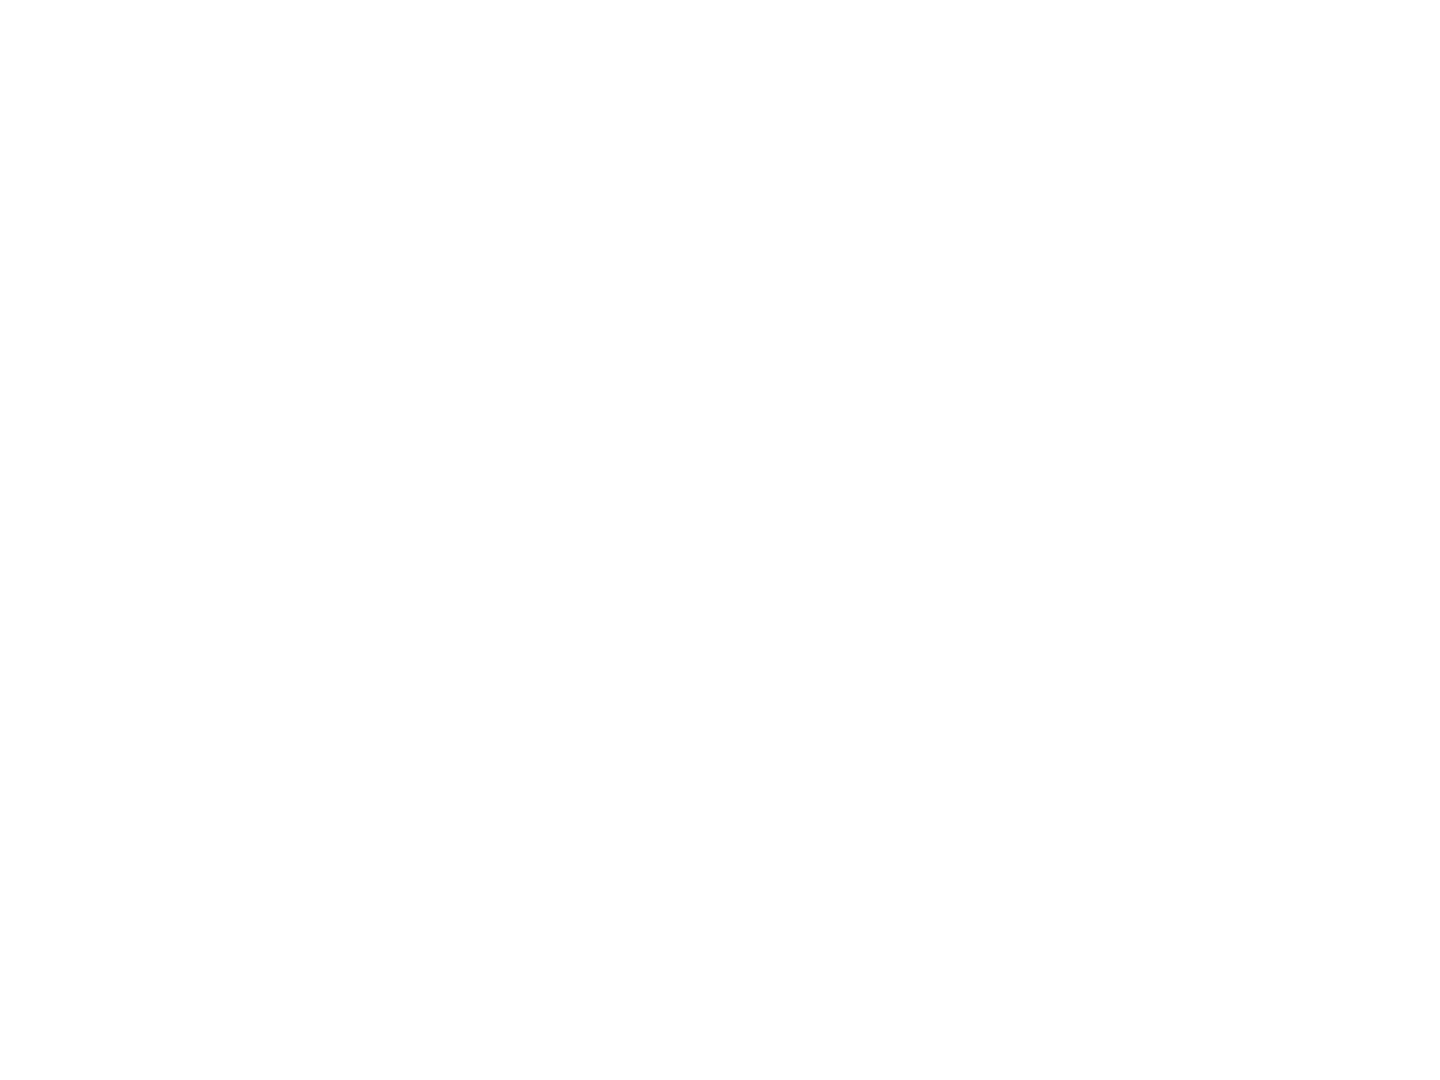

In [196]:
import matplotlib.pyplot as plt
X.hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings book ISBN 055358264X has received')
plt.show()